In [9]:
################################
## Getting started & Data Set ##
################################

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#one_hot=TRUE: Conduct one-hot-encoding, i.e. the digit "1" [integer encoding] 
#              will be represented as (0,1,0,0,0,0,0,0,0,0).
#              28x28 pixels are flattened into a 784 vector
#              Grayscale of each pixel between 0 and 255 (black 255)

print(mnist.train.num_examples) # #55 000 train data
print(mnist.validation.num_examples) # #5000 validation data
print(mnist.test.num_examples) # #10 000 test data

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
55000
5000
10000


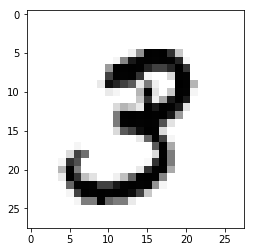

3


In [10]:
##################################
## How does the data look like? ##
##################################

import numpy as np
import matplotlib.pyplot as plt

i=1

dig = np.argmax(mnist.train.labels[i,:])
#argmax due to one-hot encoding.
#compare to using:
#dig = mnist.train.labels[i,:]

img = np.reshape(mnist.train.images[i,:], [28,28])
plt.imshow(img, cmap='Greys')
plt.show()
print(dig)

In [11]:
####################
## Architecture I ##
####################

## Five Layer NN
n_input = 784  # input layer (28x28 pixels)
#n_1 = 512  # 1st hidden layer -> is now a convolutional layers
n_1 = 4
#n_2 = 256  # 2nd hidden layer -> is now a convolutional layers
n_2 = 8
#n_3 = 128  # 3rd hidden layer -> is now a convolutional layers
n_3 = 12
n_4 = 512
n_5 = 256   # 4th hidden layer
n_6 = 128   # 5th hidden layer
n_7 = 64    # 6th hidden layer
n_output = 10  # output layer (0-9 digits)

#Define 2 tensors as placeholders (tensors that we'll feed with values later)

x     = tf.placeholder("float", [None, n_input])   #None x 784
ystar = tf.placeholder("float", [None, n_output])  #None x 10
p     = tf.placeholder(tf.float32)

#PREVIOUS: Ystar = Y

In [12]:
#####################
## Hyperparameters ##
#####################

learning_rate = 1e-4
n_iterations = 10000
batch_size = 128
#batch_size = 4112

In [13]:
#######################################
## Architecture II & Getting Started ##
#######################################

# Initial values for Weights

weights = {
    'w1': tf.Variable(tf.truncated_normal([5, 5, 1, n_1], stddev=0.1)),
          #5x5 filter, 1 input depth,   n_1 output depth
    'w2': tf.Variable(tf.truncated_normal([5, 5, n_1, n_2], stddev=0.1)),
          #5x5 filter, n_1 input depth, n_2 output depth
    'w3': tf.Variable(tf.truncated_normal([4, 4, n_2, n_3], stddev=0.1)),
          #4x4 filter, n_2 input depth, n_3 output depth
    'w4': tf.Variable(tf.truncated_normal([7*7*n_3, n_4], stddev=0.1)),
          #the output of the last conv. layer is 7 x 7 x n_3 (length x height x depth)
          #this cube will be flattened into an 7*7*n_3 tensor
    'w5': tf.Variable(tf.truncated_normal([n_4, n_5], stddev=0.1)),
    'w6': tf.Variable(tf.truncated_normal([n_5, n_6], stddev=0.1)),
    'w7': tf.Variable(tf.truncated_normal([n_6, n_7], stddev=0.1)),
    'w8': tf.Variable(tf.truncated_normal([n_7, n_output], stddev=0.1)),
}


biases = {
    'b1': tf.Variable(tf.constant(0.1, shape = [n_1])),
    'b2': tf.Variable(tf.constant(0.1, shape = [n_2])),
    'b3': tf.Variable(tf.constant(0.1, shape = [n_3])),
    'b4': tf.Variable(tf.constant(0.1, shape = [n_4])),
    'b5': tf.Variable(tf.constant(0.1, shape = [n_5])),
    'b6': tf.Variable(tf.constant(0.1, shape = [n_6])),
    'b7': tf.Variable(tf.constant(0.1, shape = [n_7])),
    'b8': tf.Variable(tf.constant(0.00001, shape = [n_output])),
}




h_1 = tf.maximum(tf.nn.conv2d(tf.reshape(x, [-1,28,28,1]), weights['w1'], strides=[1, 1, 1, 1], padding='SAME') + biases['b1'], 0)
# we have to reshape the input x to its original 28x28x1 structure
# output is 28x28, since input is 28x28 and stride = 1
# use ReLU activation function
h_2 = tf.maximum(tf.nn.conv2d(h_1, weights['w2'], strides=[1, 2, 2, 1], padding='SAME') + biases['b2'], 0)
# output is 14x14, since input is 28x28 and stride = 2 (which halves the input size)
# use ReLU activation function
h_3 = tf.maximum(tf.nn.conv2d(h_2, weights['w3'], strides=[1, 2, 2, 1], padding='SAME') + biases['b3'], 0)
# output is 7x7, since input is 14x14 and stride = 2 (which halves the input size)
# use ReLU activation function

# Now flatten the output into a 1 x 7*7*n_3 tensor:
h_3 = tf.reshape(h_3, shape=[-1, 7 * 7 * n_3])   
h_4 = tf.nn.dropout(tf.maximum(tf.add(tf.matmul(h_3, weights['w4']), biases['b4']), 0), p)   #ReLU
h_5 = tf.nn.dropout(tf.math.tanh(tf.add(tf.matmul(h_4, weights['w5']), biases['b5'])), p)    #tanh
h_6 = tf.nn.dropout(tf.maximum(tf.add(tf.matmul(h_5, weights['w6']), biases['b6']), 0), p)   #ReLU
h_7 = tf.nn.dropout(tf.maximum(tf.add(tf.matmul(h_6, weights['w7']), biases['b7']), 0), p)   #ReLU
y   = tf.math.softmax(tf.matmul(h_7, weights['w8']) + biases['b8'])                          #Softmax
#PREVIOUS: y = output_layer


In [14]:
####################################
## Loss Function and Optimization ##
####################################
#cross_entropy = -tf.reduce_mean(ystar * tf.log(y)) + 0.00001    #don't use the python-function anymore
                                                                #code it mathematically
cross_entropy = tf.reduce_mean(   
    tf.nn.softmax_cross_entropy_with_logits(  #use cross_entropy norm
        labels=ystar, logits = y
        ))

train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)
#                      #use the Adam Gradient Descent Optimizer

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [15]:
#####################
## Define Accuracy ##
#####################

correct_pred = tf.equal(tf.argmax(y, 1), tf.argmax(ystar, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [ ]:
################
## Run the NN ##
################
dropout = 0.5
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

t_loss = [None] * int(n_iterations/100)
b_loss = [None] * int(n_iterations/100)

t_acc = [None] * int(n_iterations/100)
b_acc = [None] * int(n_iterations/100)

for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    
    #batch_x = tf.reshape(batch_x, [-1,28,28,1])
    sess.run(train_step, feed_dict={
        x: batch_x, ystar: batch_y, p: 0.5}
            )

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run(
            [cross_entropy, accuracy],
            feed_dict={x: batch_x, ystar: batch_y, p: 0.5}
            )
        
        test_accuracy = sess.run(accuracy, feed_dict={
            x: mnist.test.images, ystar: mnist.test.labels, p: 1
        })
        test_loss     = sess.run(cross_entropy, feed_dict={
            x: mnist.test.images, ystar: mnist.test.labels, p: 1
        }) 
        
        
        j=int(i/100)
        t_loss[j] = test_loss
        b_loss[j] = minibatch_loss
        
        t_acc[j]  = test_accuracy
        b_acc[j]  = minibatch_accuracy
        
        print(
            "Iteration",
            str(i),
            "\t Minibatch-Loss =",
            str(minibatch_loss),
            "\t Minibatch-Accuracy =",
            str(minibatch_accuracy))
        print(
            "Iteration",
            str(i),
            "\t Test-loss      =",
            str(test_loss),
            "\t Test-Accuracy      =",
            str(test_accuracy)
            )
        print("------------------------------------------------------------------------------")

Iteration 0 	 Minibatch-Loss = 2.2899227 	 Minibatch-Accuracy = 0.15625
Iteration 0 	 Test-loss      = 2.3016875 	 Test-Accuracy      = 0.1137
------------------------------------------------------------------------------
Iteration 100 	 Minibatch-Loss = 2.0135384 	 Minibatch-Accuracy = 0.4609375
Iteration 100 	 Test-loss      = 1.9585863 	 Test-Accuracy      = 0.4909
------------------------------------------------------------------------------
Iteration 200 	 Minibatch-Loss = 1.7767408 	 Minibatch-Accuracy = 0.7109375
Iteration 200 	 Test-loss      = 1.6764102 	 Test-Accuracy      = 0.7947
------------------------------------------------------------------------------
Iteration 300 	 Minibatch-Loss = 1.691487 	 Minibatch-Accuracy = 0.765625
Iteration 300 	 Test-loss      = 1.5792787 	 Test-Accuracy      = 0.8823
------------------------------------------------------------------------------
Iteration 400 	 Minibatch-Loss = 1.5644668 	 Minibatch-Accuracy = 0.8984375
Iteration 400 	 Test

Iteration 3600 	 Minibatch-Loss = 1.5145142 	 Minibatch-Accuracy = 0.9453125
Iteration 3600 	 Test-loss      = 1.4836637 	 Test-Accuracy      = 0.9775
------------------------------------------------------------------------------
Iteration 3700 	 Minibatch-Loss = 1.5009458 	 Minibatch-Accuracy = 0.9609375
Iteration 3700 	 Test-loss      = 1.4852984 	 Test-Accuracy      = 0.9759
------------------------------------------------------------------------------
Iteration 3800 	 Minibatch-Loss = 1.4936577 	 Minibatch-Accuracy = 0.96875
Iteration 3800 	 Test-loss      = 1.4850017 	 Test-Accuracy      = 0.976
------------------------------------------------------------------------------
Iteration 3900 	 Minibatch-Loss = 1.4771861 	 Minibatch-Accuracy = 0.984375
Iteration 3900 	 Test-loss      = 1.4900789 	 Test-Accuracy      = 0.971
------------------------------------------------------------------------------
Iteration 4000 	 Minibatch-Loss = 1.5002666 	 Minibatch-Accuracy = 0.9609375
Iteratio

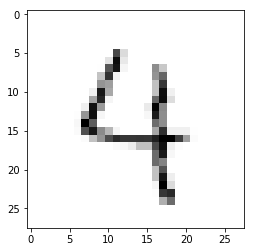

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_5' with dtype float
	 [[node Placeholder_5 (defined at <ipython-input-10-c677e8dac514>:24) ]]

Caused by op 'Placeholder_5', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-c677e8dac514>", line 24, in <module>
    p     = tf.placeholder(tf.float32)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py", line 2077, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 5791, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_5' with dtype float
	 [[node Placeholder_5 (defined at <ipython-input-10-c677e8dac514>:24) ]]


In [20]:
#######################################
## Checking the performance manually ##
#######################################

test_digit = 24

img = np.reshape(mnist.test.images[test_digit,:], [28,28])
plt.imshow(img, cmap='Greys')
plt.show()

#dig = np.argmax(mnist.test.labels[test_digit,:])
#print(dig)

prediction = sess.run(tf.argmax(y, 1), feed_dict={x: mnist.test.images})
print ("Prediction:", np.squeeze(prediction)[test_digit])

Text(0.5, 1.0, 'Loss for Minibatch (red) and Test-Data (blue)')

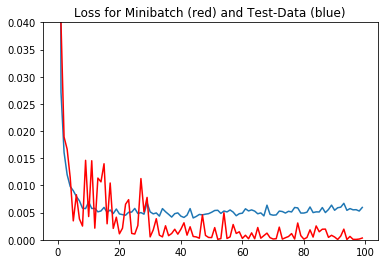

In [17]:
pr = np.arange(int(n_iterations/100))
plt.ylim(0,0.04)
plt.plot(pr,t_loss, pr, b_loss, 'r')
plt.title('Loss for Minibatch (red) and Test-Data (blue)')

Text(0.5, 1.0, 'Accuracy for Minibatch (red) and Test-Data (blue)')

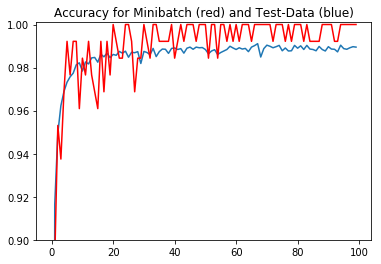

In [18]:
pr = np.arange(int(n_iterations/100))
plt.ylim(0.9,1.001)
plt.plot(pr,t_acc, pr, b_acc, 'r')
plt.title('Accuracy for Minibatch (red) and Test-Data (blue)' )